## Exploratory Data Analysis

This exploratory data analysis provided a comprehensive overview of customer behaviors, revenue drivers, and product performance.

### Buyer Persona & Customer Insights
- The **typical buyer** is a man or woman aged **56+**, from **Germany**, and is a **regular customer**.
- The **discount buyer persona** also matches this profile: **German, aged 56–65, regular customer**.
- **Age and turnover** are slightly related — older customers tend to contribute more to overall revenue.

### Product Performance & Preferences
- **Top-selling books** include:
  - *Scott Pilgrim's Precious Little Life*
  - *Tipping the Velvet*
  - *Soumission*
  - *A Light in the Attic*
  - *The Black Maria*
  
- **Top-rated books** (average rating):
  - *Set Me Free* – 3.61  
  - *Shakespeare's Sonnets* – 3.61  
  - *A Light in the Attic* – 3.51  
  - *The Coming Woman* – 3.46  
  - *Rip it Up and Start Again* – 3.44  

- **Poetry** is the **most profitable category**, while **Business** is the **least**.
- Readers born **before and after 1990** share similar preferences in book categories, especially in **Poetry**, **Young Adult**, and **Default**.

### Revenue & Seasonality
- **Summer months** consistently stand out as the **strongest in terms of sales**, indicating seasonal purchasing trends.
- **Publishing houses** generate **higher basket sizes and overall turnover** compared to individual sellers.
- **Top-performing sellers** by revenue include:
  - Beth Keller
  - Kevin Cox
  - Melanie Herrera
  - Daniel Adams
  - Crystal Johnson

### Relationships & Correlations
- A **weak negative correlation** exists between **price and rating** — higher-priced books tend to receive slightly lower ratings.

In [ ]:
# importing modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing files

buyers = pd.read_csv(r"C:\Users\Desktop\results_python\buyers.csv")
products = pd.read_csv(r"C:\Users\Desktop\results_python\products.csv")
reviews = pd.read_csv(r"C:\Users\Desktop\results_python\reviews.csv")
sellers = pd.read_csv(r"C:\Users\Desktop\results_python\sellers.csv")
transactions = pd.read_csv(r"C:\Users\Desktop\results_python\transactions.csv")

# setting a plot style

plt.style.use('ggplot')

In [487]:
""" basic understanding of the BUYERS """

' basic understanding of the BUYERS '

In [488]:
buyers.shape

(3000, 6)

In [489]:
buyers.head(10)

,buyer_id,name,gender,birthdate,country,customer_type
0,1,Matthew Lucas,F,1948-08-22,Spain,régulier
1,2,Gerald Hensley,F,1961-06-09,Germany,nouveau
2,3,Joshua Taylor,M,1957-01-01,Italy,vip
3,4,David Leblanc,M,1974-09-03,Netherlands,régulier
4,5,Savannah Garcia,M,1988-11-23,Belgium,régulier
5,6,Dr. Tracy House Dvm,M,1955-11-01,Germany,régulier
6,7,John Hancock,F,2005-12-05,Italy,nouveau
7,8,James Galloway,M,1962-07-25,Spain,régulier
8,9,Rachel Mitchell,F,1991-12-02,Belgium,régulier
9,10,Whitney Peters,F,1993-05-28,Germany,régulier


In [490]:
buyers.dtypes

buyer_id          int64
name             object
gender           object
birthdate        object
country          object
customer_type    object
dtype: object

In [491]:
buyers.describe()

,buyer_id
count,3000.000000
mean,1500.500000
std,866.169729
min,1.000000
25%,750.750000
50%,1500.500000
75%,2250.250000
max,3000.000000


In [492]:
buyers.columns

Index(['buyer_id', 'name', 'gender', 'birthdate', 'country', 'customer_type'], dtype='object')

In [493]:
""" data preperation of the BUYERS """

' data preperation of the BUYERS '

In [494]:
# changing data types of the columns

def convert_date(df,col):
    df[col] = pd.to_datetime(df[col], errors='coerce')
    return df.dtypes

In [495]:
convert_date(buyers,'birthdate')

buyer_id                  int64
name                     object
gender                   object
birthdate        datetime64[ns]
country                  object
customer_type            object
dtype: object

In [496]:
buyers.isnull().sum()

buyer_id         0
name             0
gender           0
birthdate        0
country          0
customer_type    0
dtype: int64

In [497]:
def def_duplicated(df):
    return df.loc[df.duplicated(keep=False)]

In [498]:
def_duplicated(buyers)

,buyer_id,name,gender,birthdate,country,customer_type


In [499]:
def del_duplicated(df):
    df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [500]:
del_duplicated(buyers)

In [501]:
from datetime import date

days_in_year = 365.2425
buyers["age"] = ((pd.Timestamp.today() - buyers["birthdate"]).dt.days / days_in_year).astype("int")

In [502]:
""" BUYERS feature understanding (univariate analysis) """

' BUYERS feature understanding (univariate analysis) '

In [503]:
buyers.head()

,buyer_id,name,gender,birthdate,country,customer_type,age
0,1,Matthew Lucas,F,1948-08-22,Spain,régulier,76
1,2,Gerald Hensley,F,1961-06-09,Germany,nouveau,64
2,3,Joshua Taylor,M,1957-01-01,Italy,vip,68
3,4,David Leblanc,M,1974-09-03,Netherlands,régulier,50
4,5,Savannah Garcia,M,1988-11-23,Belgium,régulier,36


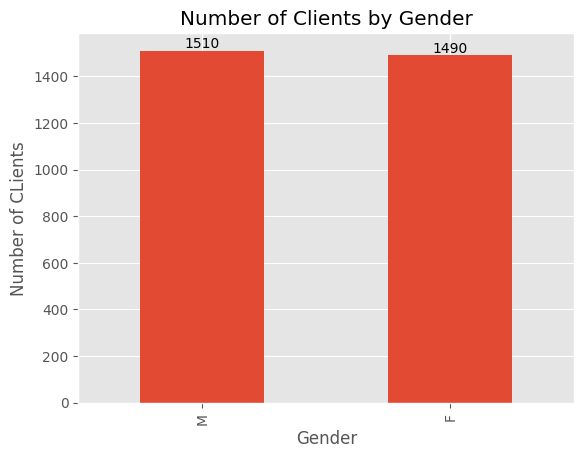

In [504]:
""" buyer persona (gender) """

ax = buyers['gender'].value_counts().plot(kind='bar', title='Number of Clients by Gender')
ax.set_xlabel("Gender")
ax.set_ylabel("Number of CLients")

for bar in ax.patches: # ax.patches gives access to the list of bars
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}', # text
        xy=(bar.get_x() + (bar.get_width() / 2), height), # position tuple (float,float) (x,y)
        ha='center', va='bottom', fontsize=10 # alignment
    )
plt.show()

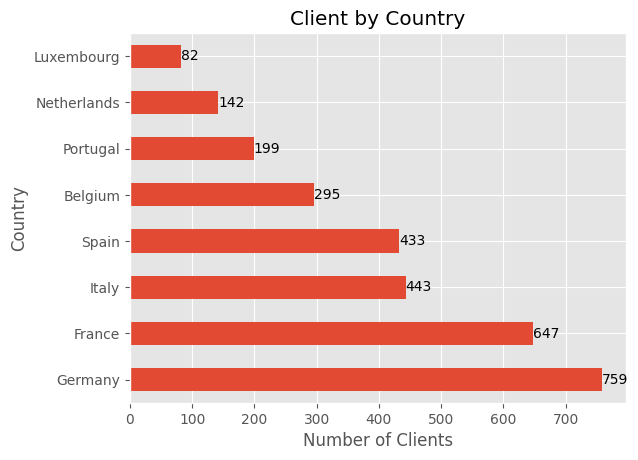

In [505]:
""" buyer persona (country)"""

ax = buyers['country'].value_counts().plot(kind='barh', title='Client by Country')
ax.set_xlabel('Number of Clients')
ax.set_ylabel('Country')

for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(
        f'{int(width)}',
        xy=(width, (bar.get_y() + bar.get_height() / 2)),
        ha='left', va='center', fontsize=10
    )

plt.show()

In [506]:
""" translating the data from French to English """

buyers['customer_type'] = buyers['customer_type'].replace('régulier', 'regular')
buyers['customer_type'] = buyers['customer_type'].replace('nouveau', 'new')

def count_the_values(dfcol):
    return dfcol.value_counts()

count_the_values(buyers['customer_type'])

customer_type
regular    1799
new         912
vip         289
Name: count, dtype: int64

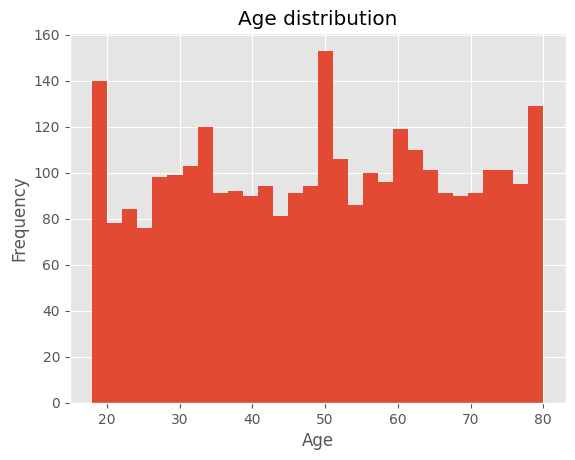

In [507]:
""" what's the age distribution of the clients """

ax = buyers['age'].plot(kind='hist', bins=30, title='Age distribution')
ax.set_xlabel('Age')
ax.set_label('Frequency')
plt.show()

In [508]:
buyers['age'].value_counts().sort_values(ascending=False).head()

age
34    66
75    64
61    62
52    61
30    60
Name: count, dtype: int64

In [509]:
""" basic understanding of the PRODUCTS """

' basic understanding of the PRODUCTS '

In [510]:
products.shape

(13, 7)

In [511]:
products.head(13)

,book_id,name,price,category,summary,rating,seller_id
0,a897fe39b1053632,A Light in the Attic,51.77,poetry,It's hard to imagine a world without A Light i...,three,39
1,90fa61229261140a,Tipping the Velvet,53.74,historical fiction,"""Erotic and absorbing...Written with starling ...",one,29
2,6957f44c3847a760,Soumission,50.10,fiction,"Dans une France assez proche de la nÃ´tre, un ...",one,15
3,f77dbf2323deb740,The Requiem Red,22.65,young adult,Patient Twenty-nine.A monster roams the halls ...,one,43
4,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,33.34,business,Drawing on his extensive experience evaluating...,four,8
5,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,17.93,default,"""If you have a heart, if you have a soul, Kare...",three,21
6,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,22.60,default,For readers of Laura Hillenbrand's Seabiscuit ...,four,39
7,1dfe412b8ac00530,The Black Maria,52.15,poetry,"Praise for Aracelis Girmay:""[Girmay's] every l...",one,19
8,0312262ecafa5a40,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99,default,"Since her assault, Miss Annette Chetwynd has b...",two,23
9,30a7f60cd76ca58c,Shakespeare's Sonnets,20.66,poetry,This book is an important and complete collect...,four,11


In [512]:
products.dtypes

book_id       object
name          object
price        float64
category      object
summary       object
rating        object
seller_id      int64
dtype: object

In [513]:
products['price'].describe()

count    13.000000
mean     34.130769
std      15.808240
min      13.990000
25%      20.660000
50%      33.340000
75%      51.770000
max      53.740000
Name: price, dtype: float64

In [514]:
products.columns

Index(['book_id', 'name', 'price', 'category', 'summary', 'rating',
       'seller_id'],
      dtype='object')

In [515]:
""" data preperation of the PRODUCTS """

' data preperation of the PRODUCTS '

In [516]:
products.head()

,book_id,name,price,category,summary,rating,seller_id
0,a897fe39b1053632,A Light in the Attic,51.77,poetry,It's hard to imagine a world without A Light i...,three,39
1,90fa61229261140a,Tipping the Velvet,53.74,historical fiction,"""Erotic and absorbing...Written with starling ...",one,29
2,6957f44c3847a760,Soumission,50.10,fiction,"Dans une France assez proche de la nÃ´tre, un ...",one,15
3,f77dbf2323deb740,The Requiem Red,22.65,young adult,Patient Twenty-nine.A monster roams the halls ...,one,43
4,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,33.34,business,Drawing on his extensive experience evaluating...,four,8


In [517]:
products.isnull().sum()

book_id      0
name         0
price        0
category     0
summary      0
rating       0
seller_id    0
dtype: int64

In [518]:
def_duplicated(products)

,book_id,name,price,category,summary,rating,seller_id


In [519]:
""" PRODUCTS feature understanding (univariate analysis) """

' PRODUCTS feature understanding (univariate analysis) '

In [520]:
products.head()

,book_id,name,price,category,summary,rating,seller_id
0,a897fe39b1053632,A Light in the Attic,51.77,poetry,It's hard to imagine a world without A Light i...,three,39
1,90fa61229261140a,Tipping the Velvet,53.74,historical fiction,"""Erotic and absorbing...Written with starling ...",one,29
2,6957f44c3847a760,Soumission,50.10,fiction,"Dans une France assez proche de la nÃ´tre, un ...",one,15
3,f77dbf2323deb740,The Requiem Red,22.65,young adult,Patient Twenty-nine.A monster roams the halls ...,one,43
4,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,33.34,business,Drawing on his extensive experience evaluating...,four,8


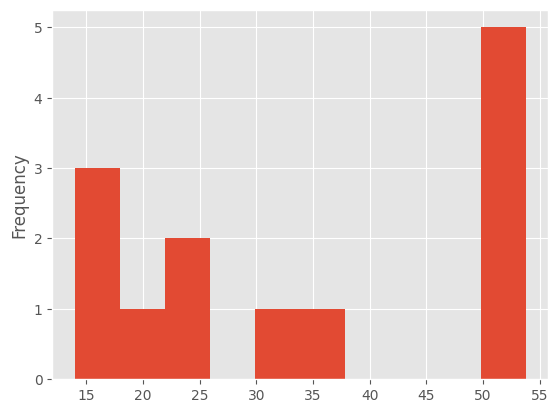

In [521]:
""" distribution of the prices """

products['price'].plot(kind='hist')
plt.show()

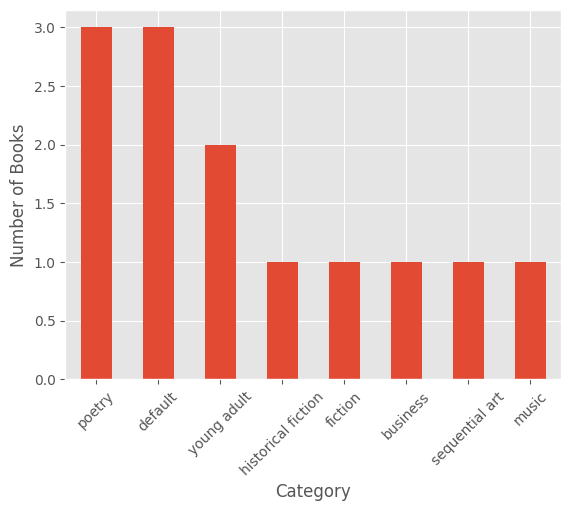

In [522]:
""" Count of books in each category in the store """

ax = products['category'].value_counts().plot(kind='bar')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Books')
ax.tick_params(axis='x', labelrotation=45)

plt.show()

In [523]:
""" basic understanding of the REVIEWS """

' basic understanding of the REVIEWS '

In [524]:
reviews.shape

(1173, 6)

In [525]:
reviews.head(10)

,review_id,book_id,review_text,rating,review_date,author
0,1,2597b5a345f45e1b,Change whether small trip another defense. C'é...,3,2022-10-13,James Shelton
1,2,1dfe412b8ac00530,Or thank others population admit why group. C'...,3,2019-06-29,Dean Cunningham
2,3,a897fe39b1053632,Without professor today family large appear se...,3,2018-05-19,Marvin Johnson
3,4,e10e1e165dc8be4a,Piece daughter head reach answer even fast wea...,4,2019-02-23,Kurt Williams
4,5,0312262ecafa5a40,Ever garden instead total husband trouble clos...,5,2024-06-02,Ethan Coleman
5,6,1dfe412b8ac00530,Contain talk by account door use positive far ...,4,2019-03-15,Mr. James Weaver DDS
6,7,e72a5dfc7e9267b2,Head development join color summer stand move ...,5,2019-12-17,Christopher Poole
7,8,f77dbf2323deb740,Argue scientist hour probably water us attenti...,3,2018-05-03,Devin Day
8,9,3b1c02bac2a429e6,Pay new Republican fly foot Congress protect c...,4,2024-04-23,Jared Madden
9,10,90fa61229261140a,Majority past large area trouble more PM guy o...,5,2018-12-17,Margaret Kelly


In [526]:
reviews.dtypes

review_id       int64
book_id        object
review_text    object
rating          int64
review_date    object
author         object
dtype: object

In [527]:
reviews.columns

Index(['review_id', 'book_id', 'review_text', 'rating', 'review_date',
       'author'],
      dtype='object')

In [528]:
""" data preperation of the REVIEWS """

' data preperation of the REVIEWS '

In [529]:
convert_date(reviews,'review_date')

review_id               int64
book_id                object
review_text            object
rating                  int64
review_date    datetime64[ns]
author                 object
dtype: object

In [530]:
reviews['year'] = reviews['review_date'].dt.year
reviews['month'] = reviews['review_date'].dt.month

In [531]:
reviews.isnull().sum()

review_id      0
book_id        0
review_text    0
rating         0
review_date    0
author         0
year           0
month          0
dtype: int64

In [532]:
def_duplicated(reviews)

,review_id,book_id,review_text,rating,review_date,author,year,month


In [533]:
""" REVIEWS feature understanding (Univariate analysis) """

' REVIEWS feature understanding (Univariate analysis) '

In [534]:
reviews.head()

,review_id,book_id,review_text,rating,review_date,author,year,month
0,1,2597b5a345f45e1b,Change whether small trip another defense. C'é...,3,2022-10-13,James Shelton,2022,10
1,2,1dfe412b8ac00530,Or thank others population admit why group. C'...,3,2019-06-29,Dean Cunningham,2019,6
2,3,a897fe39b1053632,Without professor today family large appear se...,3,2018-05-19,Marvin Johnson,2018,5
3,4,e10e1e165dc8be4a,Piece daughter head reach answer even fast wea...,4,2019-02-23,Kurt Williams,2019,2
4,5,0312262ecafa5a40,Ever garden instead total husband trouble clos...,5,2024-06-02,Ethan Coleman,2024,6


<Axes: xlabel='book_id'>

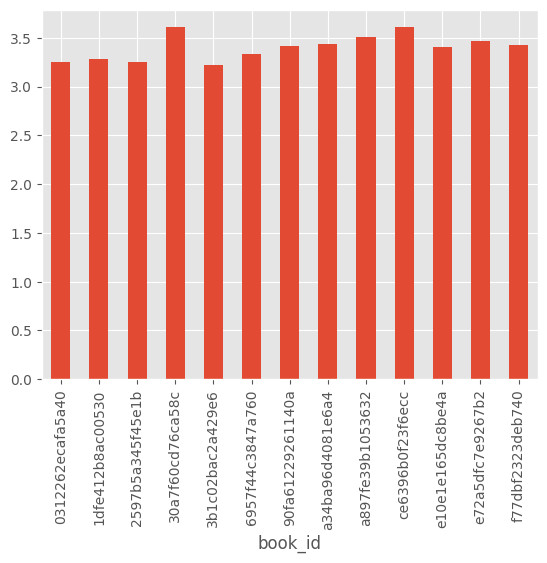

In [535]:
""" rating per book / is there a book with a bad rating ?"""

reviews.groupby('book_id')['rating'].mean().plot(kind='bar')

# i will merge them with the names in a latter phase

In [536]:
# count_the_values(reviews['author'])

# ChatGPT generated 1160 authors instead of 13, let's fix this

# I randomly generated 13 authors on ChatGPT

authors = pd.DataFrame({
    'book_id':['a897fe39b1053632',
 '90fa61229261140a',
 '6957f44c3847a760',
 'f77dbf2323deb740',
 '2597b5a345f45e1b',
 'e72a5dfc7e9267b2',
 'e10e1e165dc8be4a',
 '1dfe412b8ac00530',
 '0312262ecafa5a40',
 '30a7f60cd76ca58c',
 'ce6396b0f23f6ecc',
 '3b1c02bac2a429e6',
 'a34ba96d4081e6a4'],
 'author':[
    "Jane Austen",
    "George Orwell",
    "Haruki Murakami",
    "Chimamanda Ngozi Adichie",
    "Stephen King",
    "Toni Morrison",
    "Isaac Asimov",
    "Elena Ferrante",
    "Gabriel García Márquez",
    "Lena Blackthorn",         
    "Arthur D. Nightfall",     
    "Sophie Alveron",          
    "Khaled Hosseini"]
})

reviews = reviews.merge(authors, on='book_id', how='inner')
reviews = reviews.merge(products, on='book_id', how='inner')

reviews.head()

,review_id,book_id,review_text,rating_x,review_date,author_x,year,month,author_y,name,price,category,summary,rating_y,seller_id
0,1,2597b5a345f45e1b,Change whether small trip another defense. C'é...,3,2022-10-13,James Shelton,2022,10,Stephen King,The Dirty Little Secrets of Getting Your Dream...,33.34,business,Drawing on his extensive experience evaluating...,four,8
1,2,1dfe412b8ac00530,Or thank others population admit why group. C'...,3,2019-06-29,Dean Cunningham,2019,6,Elena Ferrante,The Black Maria,52.15,poetry,"Praise for Aracelis Girmay:""[Girmay's] every l...",one,19
2,3,a897fe39b1053632,Without professor today family large appear se...,3,2018-05-19,Marvin Johnson,2018,5,Jane Austen,A Light in the Attic,51.77,poetry,It's hard to imagine a world without A Light i...,three,39
3,4,e10e1e165dc8be4a,Piece daughter head reach answer even fast wea...,4,2019-02-23,Kurt Williams,2019,2,Isaac Asimov,The Boys in the Boat: Nine Americans and Their...,22.60,default,For readers of Laura Hillenbrand's Seabiscuit ...,four,39
4,5,0312262ecafa5a40,Ever garden instead total husband trouble clos...,5,2024-06-02,Ethan Coleman,2024,6,Gabriel García Márquez,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99,default,"Since her assault, Miss Annette Chetwynd has b...",two,23


In [537]:
reviews = reviews[['review_id', 'book_id','name', 'review_text', 'rating_x', 'review_date', 'year', 'month', 'author_y','category']].copy()

In [538]:
reviews = reviews.rename(columns={'rating_x':'rating','author_y':'author'})

reviews.head()

,review_id,book_id,name,review_text,rating,review_date,year,month,author,category
0,1,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,Change whether small trip another defense. C'é...,3,2022-10-13,2022,10,Stephen King,business
1,2,1dfe412b8ac00530,The Black Maria,Or thank others population admit why group. C'...,3,2019-06-29,2019,6,Elena Ferrante,poetry
2,3,a897fe39b1053632,A Light in the Attic,Without professor today family large appear se...,3,2018-05-19,2018,5,Jane Austen,poetry
3,4,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,Piece daughter head reach answer even fast wea...,4,2019-02-23,2019,2,Isaac Asimov,default
4,5,0312262ecafa5a40,"Starving Hearts (Triangular Trade Trilogy, #1)",Ever garden instead total husband trouble clos...,5,2024-06-02,2024,6,Gabriel García Márquez,default


C:\Users\Houssain\AppData\Local\Temp\ipykernel_23464\2017290950.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


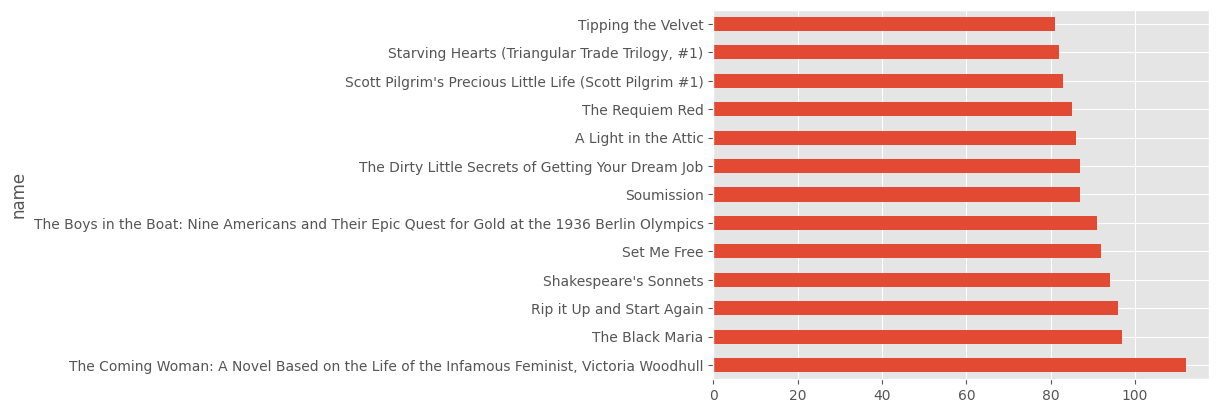

In [539]:
""" number of reviews per book """

reviews['name'].value_counts().plot(kind='barh')
plt.tight_layout()
plt.show()

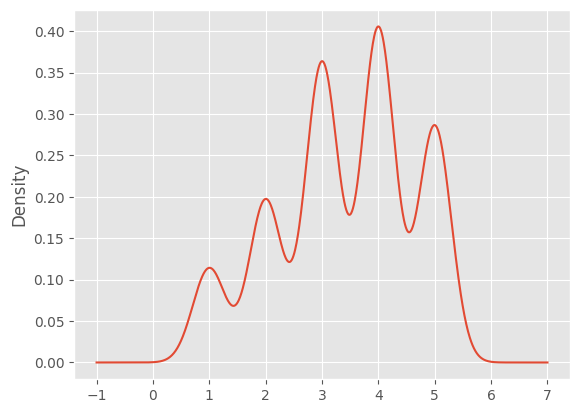

In [540]:
""" visualizing the rating distribution """

reviews['rating'].plot(kind='kde')
plt.show()

In [541]:
""" basic understanding of the SELLERS """

' basic understanding of the SELLERS '

In [542]:
sellers.shape

(50, 5)

In [543]:
sellers.head()

,seller_id,author_name,birthdate,country,seller_type
0,1,Allison Hill,1959-09-15,Spain,indépendant
1,2,Brian Yang,1981-08-18,Spain,indépendant
2,3,Javier Johnson,1959-05-25,Germany,marketplace
3,4,Lance Hoffman,1993-03-29,France,marketplace
4,5,Kimberly Robinson,1984-08-13,Netherlands,indépendant


In [544]:
sellers.dtypes

seller_id       int64
author_name    object
birthdate      object
country        object
seller_type    object
dtype: object

In [545]:
""" data preperation of the SELLERS """

' data preperation of the SELLERS '

In [546]:
convert_date(sellers,'birthdate')

seller_id               int64
author_name            object
birthdate      datetime64[ns]
country                object
seller_type            object
dtype: object

In [547]:
sellers.isnull().sum()

seller_id      0
author_name    0
birthdate      0
country        0
seller_type    0
dtype: int64

In [548]:
def_duplicated(sellers)

,seller_id,author_name,birthdate,country,seller_type


In [549]:
""" translating data from French to English"""

sellers['seller_type'] = sellers['seller_type'].replace('indépendant', 'independent')
sellers['seller_type'] = sellers['seller_type'].replace("maison d'édition", 'publishing house')

In [550]:
sellers['age'] = ((pd.Timestamp.today() - sellers['birthdate']).dt.days / days_in_year).astype(int)

In [551]:
""" SELLERS feature understanding (univariate analysis) """

' SELLERS feature understanding (univariate analysis) '

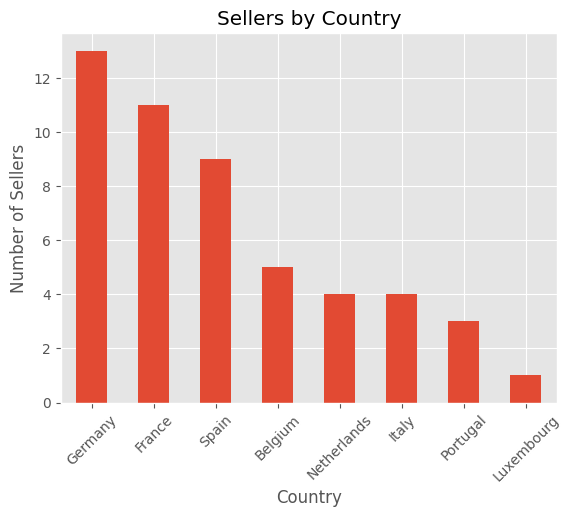

In [552]:
""" which country has the most sellers active on the store """

ax = sellers['country'].value_counts().plot(kind='bar', title='Sellers by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Sellers')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

In [553]:
count_the_values(sellers['seller_type'])

seller_type
independent         18
marketplace         17
publishing house    15
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

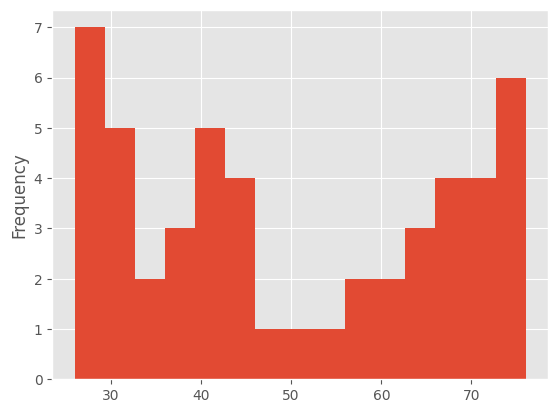

In [554]:
""" age distribution of the sellers """

sellers['age'].plot(kind='hist', bins=15)

In [555]:
""" basic understanding of the TRANSACTIONS """

' basic understanding of the TRANSACTIONS '

In [556]:
transactions.shape

(13988, 7)

In [557]:
transactions.head()

,transaction_id,book_id,buyer_id,price,price_paid,discount_rate,date
0,1,0312262ecafa5a40,1862,13.99,13.99,0.00,2026-11-13
1,2,a34ba96d4081e6a4,157,35.02,33.27,0.05,2019-04-17
2,3,30a7f60cd76ca58c,1925,20.66,18.59,0.10,2021-11-30
3,4,a897fe39b1053632,875,51.77,51.77,0.00,2020-05-30
4,5,0312262ecafa5a40,129,13.99,13.99,0.00,2022-01-17


In [558]:
transactions.dtypes

transaction_id      int64
book_id            object
buyer_id            int64
price             float64
price_paid        float64
discount_rate     float64
date               object
dtype: object

In [559]:
transactions.describe()

,transaction_id,buyer_id,price,price_paid,discount_rate
count,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000
mean,7131.340578,1489.463540,34.004796,32.886480,0.033014
std,4120.855676,871.313954,15.209350,14.925804,0.067699
min,1.000000,1.000000,13.990000,10.490000,0.000000
25%,3562.750000,725.750000,20.660000,18.590000,0.000000
50%,7127.500000,1503.000000,33.340000,31.670000,0.000000
75%,10698.250000,2245.000000,51.770000,50.100000,0.000000
max,14280.000000,3000.000000,53.740000,53.740000,0.250000


In [560]:
""" data preperation of the TRANSACTIONS """

' data preperation of the TRANSACTIONS '

In [561]:
convert_date(transactions,'date')

transaction_id             int64
book_id                   object
buyer_id                   int64
price                    float64
price_paid               float64
discount_rate            float64
date              datetime64[ns]
dtype: object

In [562]:
transactions.isnull().sum()

transaction_id    0
book_id           0
buyer_id          0
price             0
price_paid        0
discount_rate     0
date              0
dtype: int64

In [563]:

transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month

In [564]:
transactions = transactions[transactions['year'] != 2026].copy()

In [565]:
""" TRANSACTIONS feature understanding (univariate analysis) """

' TRANSACTIONS feature understanding (univariate analysis) '

In [566]:
transactions.head()

,transaction_id,book_id,buyer_id,price,price_paid,discount_rate,date,year,month
1,2,a34ba96d4081e6a4,157,35.02,33.27,0.05,2019-04-17,2019,4
2,3,30a7f60cd76ca58c,1925,20.66,18.59,0.10,2021-11-30,2021,11
3,4,a897fe39b1053632,875,51.77,51.77,0.00,2020-05-30,2020,5
4,5,0312262ecafa5a40,129,13.99,13.99,0.00,2022-01-17,2022,1
5,6,2597b5a345f45e1b,2463,33.34,33.34,0.00,2017-03-30,2017,3


In [567]:
print(round(transactions['price_paid'].sum(),2))

458770.71


In [568]:
count_the_values(transactions['discount_rate'])

discount_rate
0.00    10672
0.10     1165
0.15      934
0.25      727
0.05      451
Name: count, dtype: int64

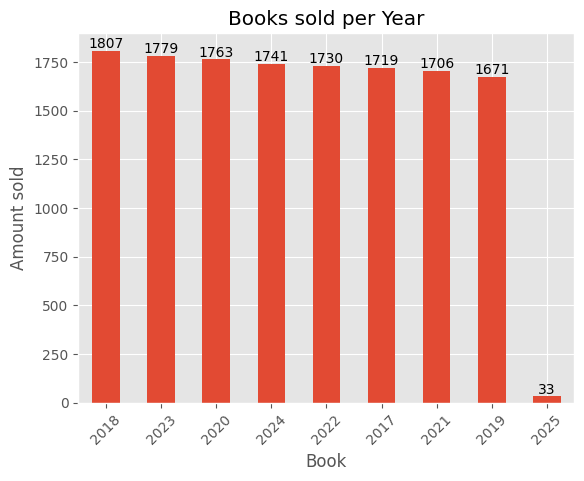

In [569]:
""" books sold by year """

ax = transactions['year'].value_counts().plot(kind='bar', title='Books sold per Year')
ax.set_xlabel('Book')
ax.set_ylabel('Amount sold')
ax.tick_params(axis='x', labelrotation=45)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom', fontsize=10
    )

plt.show()

<Axes: xlabel='year'>

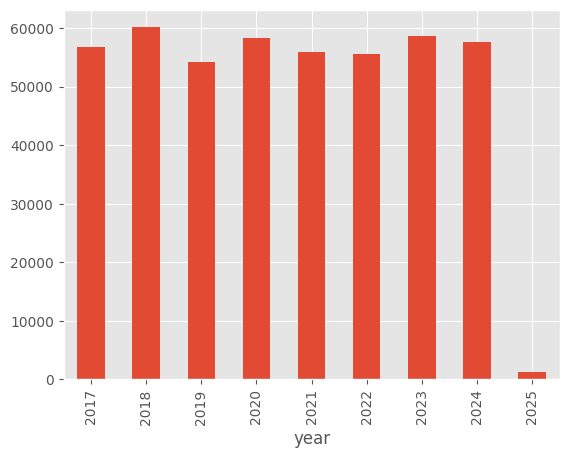

In [570]:
""" turnover by year """

transactions.groupby('year')['price_paid'].sum().plot(kind='bar')

In [571]:
""" TABLES feature relationships (Bivariate analysis) """

' TABLES feature relationships (Bivariate analysis) '

In [ ]:
""" Does the customer's age have influence on the average price paid """

transactions_buyers_df = pd.merge(transactions, buyers, on='buyer_id', how='inner')

In [573]:
turnover_per_age = transactions_buyers_df.groupby('age')['price_paid'].mean()

age = pd.Series(turnover_per_age.index)
price = pd.Series(turnover_per_age.values)

correlation_age_price = age.corr(price)

print(f'The correlation between age and price is: {correlation_age_price}')

The correlation between age and price is: 0.24662617487759


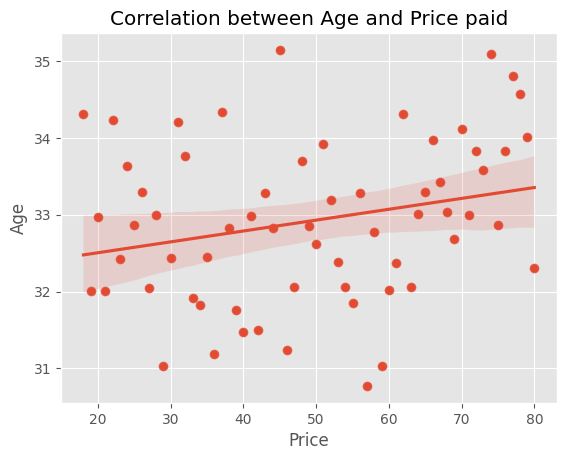

' There is a weak positive correlation. When one variable increases the other slightly increases too '

In [574]:
sns.scatterplot(x=age, y=price)
sns.regplot(x=age, y=price)
plt.title('Correlation between Age and Price paid')
plt.xlabel('Price')
plt.ylabel('Age')
plt.show()

""" There is a weak positive correlation. When one variable increases the other slightly increases too """

In [ ]:
""" Are the books with a higher rating more expensive ? """

reviews_products_df = reviews.merge(products, on='book_id', how='inner')

In [576]:
rating_per_price = reviews_products_df.groupby("name_x").agg({
    'price':'mean',
    'rating_x':'mean'
})

In [577]:
correlation_rating_price = rating_per_price['price'].corr(rating_per_price['rating_x'])
print(f'The correlation between price and rating is: {correlation_rating_price}')

The correlation between price and rating is: -0.36011433669869963


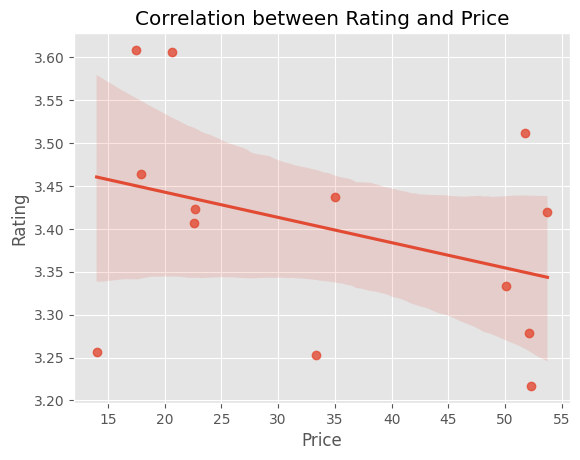

' The correlation of -0.360 suggest a weak negative relationship, meaning that while one variable slightly decreases the other increases '

In [578]:
sns.regplot(x=rating_per_price['price'], y=rating_per_price['rating_x'])
plt.title('Correlation between Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

""" The correlation of -0.360 suggest a weak negative relationship, meaning that while one variable slightly decreases the other increases """

In [579]:
""" Is there a correlation between the buyer's age and the seller's age. Do the younger clients buy from authors in the same age group ? """

" Is there a correlation between the buyer's age and the seller's age. Do the younger clients buy from authors in the same age group ? "

In [580]:
products_sellers_df = products.merge(sellers, on='seller_id', how='inner')
transactions_buyers_products_sellers_df = transactions_buyers_df.merge(products_sellers_df, on='book_id', how='inner')

correlation_age_df = transactions_buyers_products_sellers_df[['buyer_id', 'name_x', 'age_x', 'seller_id', 'author_name', 'age_y']]
correlation_age_df = correlation_age_df.rename(columns={
    'age_y':'age_author',
    'age_x':'age_buyer'
})

In [581]:
correlation_age_df = correlation_age_df.groupby('age_author')['age_buyer'].mean()

age_author = pd.Series(correlation_age_df.index)
age_seller = pd.Series(correlation_age_df.values)

correlation_age = age_author.corr(age_seller)
print(f'The correlation between the age of the author and the age of the customer is {correlation_age}')
print('The correlation between the two variables is very low (-0.05)')

The correlation between the age of the author and the age of the customer is -0.0527289879338852
The correlation between the two variables is very low (-0.05)


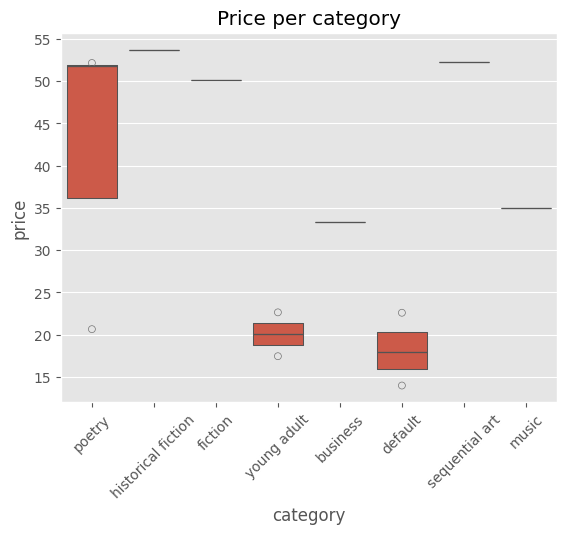

' Category do play a role in the price of the books. Young adult & default are the cheapest in comparison with historical fiction and sequential art'

In [582]:
""" Comparison of price per category. Are books more expensive in one category than another ? """

sns.boxenplot(data=products, x=products['category'], y=products['price'])
plt.xticks(rotation=45)
plt.title('Price per category')
plt.show()

""" Category do play a role in the price of the books. Young adult & default are the cheapest in comparison with historical fiction and sequential art"""

In [583]:
""" Theme based analysis """

' Theme based analysis '

In [584]:
""" Customers & Buying Behavior """
""" 1. What is the typical profile of our buyers? (Gender, country, age group, customer type) """

transactions_buyers_df.groupby('gender').agg({
    'gender':'count',
    'price_paid':'mean'
})

""" Women and men are very similar when compared on the average basket. Even though, men score slightly better when we count the number of transactions and turnover generated """

' Women and men are very similar when compared on the average basket. Even though, men score slightly better when we count the number of transactions and turnover generated '

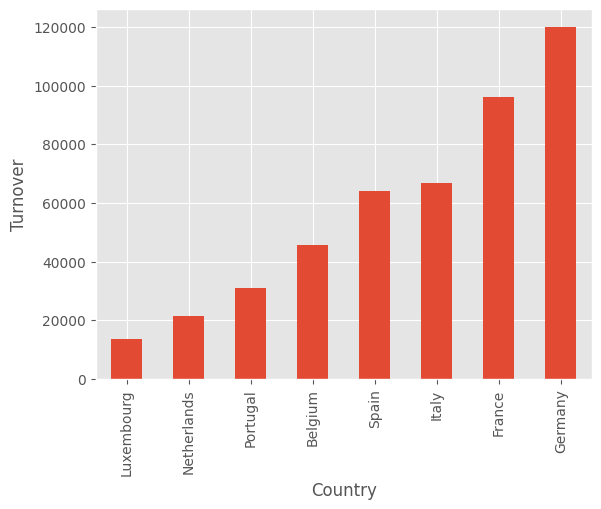

' Germany, France and Italy score the best in turnover generated over the years'

In [585]:
ax = transactions_buyers_df.groupby('country')['price_paid'].sum().sort_values().plot(kind='bar')
ax.set_xlabel('Country')
ax.set_ylabel('Turnover')
plt.show()

""" Germany, France and Italy score the best in turnover generated over the years"""

C:\Users\Houssain\AppData\Local\Temp\ipykernel_23464\1624565350.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bins_turnover = transactions_buyers_df.groupby('age_bins')['price_paid'].sum()


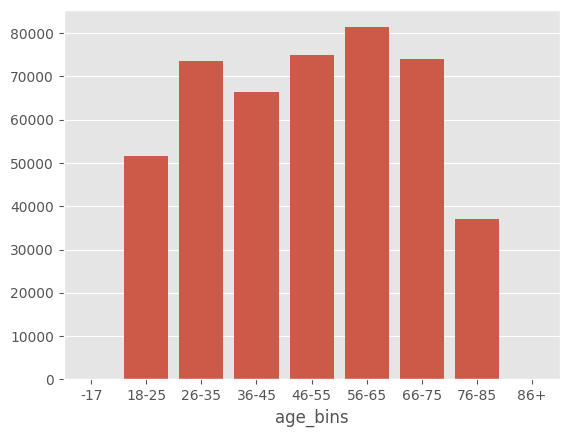

' The correlation between age and turnover generated is strong and positive. It can also be explained because of the high number of elderly customers. The whole group is almost equivalent when comapred with their means '

In [ ]:
buyers['age_bins'] = pd.cut(
    buyers['age'],
    bins=[0,17,25,35,45,55,65,75,85,100],
    labels=['-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']
)

transactions_buyers_df = pd.merge(transactions, buyers, on='buyer_id', how='inner')

# age_bins_turnover = transactions_buyers_df.groupby('age_bins')['price_paid'].mean()
age_bins_turnover = transactions_buyers_df.groupby('age_bins')['price_paid'].sum()

sns.barplot(x=age_bins_turnover.index, y= age_bins_turnover.values)
plt.show()

""" The customers age ranges between 26-35 with 56 - 65 as the group with the most turnover generated"""

In [587]:
transactions_buyers_df.groupby('customer_type')['customer_type'].count().sort_values()

customer_type
vip        1321
new        4273
regular    8355
Name: customer_type, dtype: int64

In [588]:
""" The buyer persona of the company is a man/woman that is 56+ years old from Germany. He/She is a regular customer of the shop """

' The buyer persona of the company is a man/woman that is 56+ years old from Germany. He/She is a regular customer of the shop '

In [ ]:
""" Customers & Buying Behavior """
""" 2. Do regular customers spend more than new ones? (Average `price_paid` per customer type) """

transactions_buyers_df.groupby('customer_type').agg({
    'price_paid': ['mean','sum']
})

""" The three types have a similar average basket. But in terms of total turnover, the regular clients are far ahead. It's explained by the high number of regular customers """

" The three types have a similar average basket. But in terms of total turnover, the regular clients are far ahead. It's explained by the high number of regular customers "

In [590]:
""" Customers & Buying Behavior """
""" 3. Is there a difference in average basket size based on gender or country? (Average `price_paid` by gender or country) """

transactions_buyers_df.groupby("gender")["price_paid"].mean()
transactions_buyers_df.groupby("country")["price_paid"].mean().sort_values(ascending=False)

""" There isn't a big difference in average basket when gender and countries are compared"""


" There isn't a big difference in average basket when gender and countries are compared"

In [ ]:
""" Customers & Buying Behavior """
""" 4. Do people born after 1990 buy different books than those born before? (Cross-analysis between `birthdate` and `category`) """

transactions_buyers_products_df = transactions_buyers_df.merge(products, on='book_id', how='inner')

transactions_buyers_products_df.query('age > 35').groupby('category')['category'].count().sort_values() 

category
music                  717
business               761
historical fiction     769
sequential art         784
fiction                815
young adult           1566
poetry                2310
default               2407
Name: category, dtype: int64

In [592]:
transactions_buyers_products_df.query('age <= 35').groupby('category')['category'].count().sort_values() 

""" Both age groupes are fan of the same categories of books"""

' Both age groupes are fan of the same categories of books'

In [593]:
""" Customers & Buying Behavior """
""" 5. How many transactions were made by German customers? """

transactions_buyers_df.query('country == "Germany"')['country'].value_counts()

""" 3652 transactions """

' 3652 transactions '

In [594]:
""" Products & Sales """
""" 1. What are the top 5 best-selling books (by total revenue)? """

transactions_buyers_products_df.groupby('name_y')['price_paid'].sum().sort_values(ascending=False).head()

""" Top 5 books by revenue are name_y
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)    
Tipping the Velvet                                         
Soumission                                                 
A Light in the Attic                                       
The Black Maria                                            
 """

" Top 5 books by revenue are name_y\nScott Pilgrim's Precious Little Life (Scott Pilgrim #1)    \nTipping the Velvet                                         \nSoumission                                                 \nA Light in the Attic                                       \nThe Black Maria                                            \n "

In [ ]:
""" Products & Sales """
""" 2. Which book categories are the most and least profitable? """

top = transactions_buyers_products_df.groupby('category')['price_paid'].sum().sort_values().idxmax()
least = transactions_buyers_products_df.groupby('category')['price_paid'].sum().sort_values().idxmin()

""" Most profitable is poetry and least is business """

print(f' The most profitable category is {top}, and the least profitable category is {least}')

 The most profitable category is poetry, and the least profitable category is business


In [596]:
""" Products & Sales """
""" 3. What are the top 5 best-selling categories (by total revenue)? """

transactions_buyers_products_df.groupby('category')['price_paid'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head()

""" Default is selling more books than poetry. However, the books in the poetry category are more expensive. """

' Default is selling more books than poetry. However, the books in the poetry category are more expensive. '

In [597]:
""" Discounts & Promotions """
""" 1. What is the average discount applied per book category? """

transactions_buyers_products_df.query('discount_rate != 0.0').groupby('category')['discount_rate'].mean().sort_values()

""" The average discount rate goes from music (least: 0.131) and default (most: 0.144)"""

' The average discount rate goes from music (least: 0.131) and default (most: 0.144)'

In [598]:
""" Discounts & Promotions """
""" 2. Do customers buy more during high-discount periods? (Analyze correlation between `discount_rate` and monthly volume) """

transactions_buyers_df.query('year == 2024').groupby('month')[['discount_rate', 'price_paid']].agg({
    'discount_rate': 'mean',
    'price_paid': 'sum'
})

""" Discount doesn't have any positive effect on the turnover """

" Discount doesn't have any positive effect on the turnover "

In [599]:
""" Time-Based Trends  """
""" 1. What is the total monthly revenue over the last 5 years? """

transactions['year_month'] = transactions['year'].astype(str) + '-' + transactions['month'].astype(str).str.zfill(2)
transactions.groupby('year_month')['price_paid'].sum().sort_index()

""" What we can notice is that over the years, the best sales months were most of the time between May and August """

' What we can notice is that over the years, the best sales months were most of the time between May and August '

In [600]:
transactions.groupby('year_month')['price_paid'].sum().sort_values(ascending=False).head(10)

year_month
2017-07    6139.89
2021-07    5886.59
2024-08    5850.96
2018-07    5733.17
2017-05    5680.11
2018-08    5664.07
2023-07    5602.21
2020-06    5586.33
2018-03    5563.16
2017-10    5525.47
Name: price_paid, dtype: float64

' Most of the peaks are during the summer '

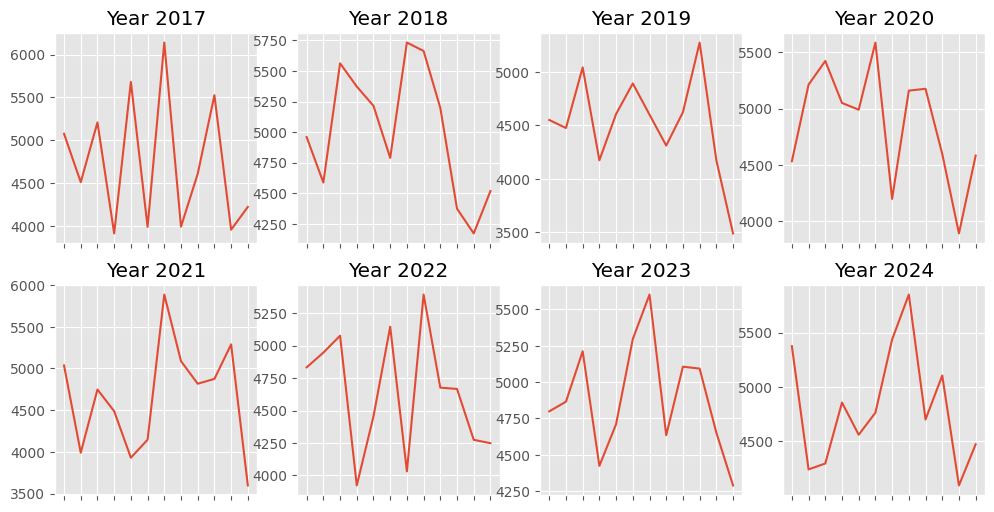

In [601]:
""" Time-Based Trends  """
""" 2. Are there seasonal sales peaks? (e.g. November, back-to-school) """

a1 = transactions.query('year == 2017').groupby('year_month')['price_paid'].sum().sort_index()
a2 = transactions.query('year == 2018').groupby('year_month')['price_paid'].sum().sort_index()
a3 = transactions.query('year == 2019').groupby('year_month')['price_paid'].sum().sort_index()
a4 = transactions.query('year == 2020').groupby('year_month')['price_paid'].sum().sort_index()

b1 = transactions.query('year == 2021').groupby('year_month')['price_paid'].sum().sort_index()
b2 = transactions.query('year == 2022').groupby('year_month')['price_paid'].sum().sort_index()
b3 = transactions.query('year == 2023').groupby('year_month')['price_paid'].sum().sort_index()
b4 = transactions.query('year == 2024').groupby('year_month')['price_paid'].sum().sort_index()

fig, axes = plt.subplots(nrows= 2, ncols=4, figsize=(12,6))

axes[0,0].plot(a1.index, a1.values)
axes[0,0].set_title('Year 2017')
axes[0,0].tick_params(labelbottom=False)

axes[0,1].plot(a2.index, a2.values)
axes[0,1].set_title('Year 2018')
axes[0,1].tick_params(labelbottom=False)

axes[0,2].plot(a3.index, a3.values)
axes[0,2].set_title('Year 2019')
axes[0,2].tick_params(labelbottom=False)

axes[0,3].plot(a4.index, a4.values)
axes[0,3].set_title('Year 2020')
axes[0,3].tick_params(labelbottom=False)

axes[1,0].plot(b1.index, b1.values)
axes[1,0].set_title('Year 2021')
axes[1,0].tick_params(labelbottom=False)

axes[1,1].plot(b2.index, b2.values)
axes[1,1].set_title('Year 2022')
axes[1,1].tick_params(labelbottom=False)

axes[1,2].plot(b3.index, b3.values)
axes[1,2].set_title('Year 2023')
axes[1,2].tick_params(labelbottom=False)

axes[1,3].plot(b4.index, b4.values)
axes[1,3].set_title('Year 2024')
axes[1,3].tick_params(labelbottom=False)

""" Most of the peaks are during the summer """

In [602]:
""" Seller Performance  """
""" 1. Which sellers generate the most revenue? """

transactions_buyers_products_sellers_df.groupby('author_name')['price_paid'].sum().sort_values(ascending=False).head()

"""
Beth Keller        
Kevin Cox          
Melanie Herrera    
Daniel Adams       
Crystal Johnson    
"""

'\nBeth Keller        \nKevin Cox          \nMelanie Herrera    \nDaniel Adams       \nCrystal Johnson    \n'

In [603]:
""" Seller Performance  """
""" 2. Do independent sellers or publishing houses perform better? """

transactions_buyers_products_sellers_df.query('seller_type != "marketplace"').groupby('seller_type')['price_paid'].agg(['sum','mean'])

""" Publishing houses perform better in average basket and in total turnover """


' Publishing houses perform better in average basket and in total turnover '

In [604]:
""" Reading Behavior & Reviews  """
""" 1. Which books receive the most positive feedback? """

reviews_products_df.groupby('name_y')['rating_x'].mean().sort_values(ascending=False).head()

"""
Top 5 highest rated books:
Set Me Free                                                                                3.608696
Shakespeare's Sonnets                                                                      3.606383
A Light in the Attic                                                                       3.511628
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull    3.464286
Rip it Up and Start Again                                                                  3.437500
"""

"\nTop 5 highest rated books:\nSet Me Free                                                                                3.608696\nShakespeare's Sonnets                                                                      3.606383\nA Light in the Attic                                                                       3.511628\nThe Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull    3.464286\nRip it Up and Start Again                                                                  3.437500\n"

In [ ]:
""" Reading Behavior & Reviews  """
""" 1. Which customer profiles are most responsive to promotions? """

df_discount = transactions.query('discount_rate != 0.0').copy()

df_discount = df_discount.merge(buyers, on='buyer_id', how='inner')

age = df_discount.groupby('age_bins')['price_paid'].count().idxmax() 
gender = df_discount.groupby('gender')['price_paid'].count().idxmax()
country = df_discount.groupby('country')['price_paid'].count().idxmax()
customer_type = df_discount.groupby('customer_type')['price_paid'].count().idxmax()

df_discount_persona = pd.DataFrame({
    'age': [age],
    'gender': [gender],
    'country': [country],
    'customer_type': [customer_type]
})

df_discount_persona


""" The discount buyer persona is a man who is between 56 - 65 years old with a regular client status from Germany """

C:\Users\Houssain\AppData\Local\Temp\ipykernel_23464\1663197552.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age = df_discount.groupby('age_bins')['price_paid'].count().idxmax()


,age,gender,country,customer_type
0,56-65,M,Germany,regular
